## Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

## Load

In [5]:
train_df = pd.read_csv('./train.csv')
building_info = pd.read_csv('./building_info.csv')
test_df = pd.read_csv('./test.csv')

## 데이터 분석

### train.csv

In [6]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


target인 전력소비량(kWh)과 나머지 data로 이뤄져 있다.

num_date_tim과 일시는 같은 정보를 나타내고 있어 중복된 특성이다.

강수량(mm), 일조(hr), 일사(MJ/m2)에서 다수의 결측치가 확인되었다.

In [8]:
train_df.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000
mean,50.500000,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462
std,28.866141,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000
50%,50.500000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000
75%,75.250000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000


### building_info.csv

In [9]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [10]:
building_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


건물번호는 1~100까지 건물번호이며 건물 유형은 str타입의 건물 유형이다.

태양광용량(kW), ESS저장용량(kWh), PCS용량(kW) 세가지 columns에서 '-'로 결측치가 표현되어 있다. 결측치의 수를 확인해보자.

In [23]:
building_info[building_info['태양광용량(kW)']=='-'].count()

건물번호            64
건물유형            64
연면적(m2)         64
냉방면적(m2)        64
태양광용량(kW)       64
ESS저장용량(kWh)    64
PCS용량(kW)       64
dtype: int64

In [27]:
building_info[building_info['ESS저장용량(kWh)']=='-'].count()

건물번호            95
건물유형            95
연면적(m2)         95
냉방면적(m2)        95
태양광용량(kW)       95
ESS저장용량(kWh)    95
PCS용량(kW)       95
dtype: int64

In [28]:
building_info[building_info['PCS용량(kW)']=='-'].count()

건물번호            95
건물유형            95
연면적(m2)         95
냉방면적(m2)        95
태양광용량(kW)       95
ESS저장용량(kWh)    95
PCS용량(kW)       95
dtype: int64

총 100개의 데이터 중 각각 64, 95, 95 개의 결측치를 가지고 있어 결측치가 상당수인 것으로 보인다.

### test.csv

In [29]:
test_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


test.csv에서는 train.csv와 다르게 일조(hr), 일사(MJ/m2) 에 관한 데이터가 없다.

## 데이터 전처리

위에서 얻은 정보를 바탕으로 데이터 전처리를 시행한다.

우선 중복되는 num_date_time column을 train_df에서 제거한다.

In [45]:
train_df = train_df.drop('num_date_time', axis=1)

train_df의 일시를 시계열 모델에서 사용할 수 있는 수치적인 데이터로 변환한다.

새로은 columns는

    day = 152 ~ 236
    time  = 0 ~ 23 
    weekday = 0 ~ 6 

위와 같은 값을 가진다.

In [46]:
train_df['day'] = pd.to_datetime(train_df['일시'].apply(lambda x : x[0:9])).dt.dayofyear
train_df['time'] = train_df['일시'].apply(lambda x : int(x[9:11]))
train_df['weekday'] = pd.to_datetime(train_df['일시'].apply(lambda x : x[0:9])).dt.weekday
train_df = train_df.drop('일시', axis=1)

train_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),day,time,weekday
0,1,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,152,0,2
1,1,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,152,1,2
2,1,17.7,NaN,1.5,45.0,NaN,NaN,974.88,152,2,2
3,1,16.7,NaN,1.4,48.0,NaN,NaN,953.76,152,3,2
4,1,18.4,NaN,2.8,43.0,NaN,NaN,986.40,152,4,2
...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,NaN,0.9,86.0,0.5,NaN,881.04,236,19,2
203996,100,22.4,NaN,1.3,86.0,0.0,NaN,798.96,236,20,2
203997,100,21.3,NaN,1.0,92.0,NaN,NaN,825.12,236,21,2
203998,100,21.0,NaN,0.3,94.0,NaN,NaN,640.08,236,22,2


test.csv에서 확인할 수 없는 일조(hr), 일사(MJ/m2)를 train.csv에서도 제거한다.

In [47]:
train_df = train_df.drop(['일조(hr)', '일사(MJ/m2)'], axis=1)

일조(hr)와 일사(MJ/m2)를 제거하고 남은 결측치인 강수량과 같은 경우 측정되지 않았을 때는 비가 내리지 않은 경우로 봐도 무방하기에 결측치를 0으로 대체한다.

In [48]:
train_df = train_df.fillna(0)

train_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),day,time,weekday
0,1,18.6,0.0,0.9,42.0,1085.28,152,0,2
1,1,18.0,0.0,1.1,45.0,1047.36,152,1,2
2,1,17.7,0.0,1.5,45.0,974.88,152,2,2
3,1,16.7,0.0,1.4,48.0,953.76,152,3,2
4,1,18.4,0.0,2.8,43.0,986.40,152,4,2
...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.0,0.9,86.0,881.04,236,19,2
203996,100,22.4,0.0,1.3,86.0,798.96,236,20,2
203997,100,21.3,0.0,1.0,92.0,825.12,236,21,2
203998,100,21.0,0.0,0.3,94.0,640.08,236,22,2


building_info 에서 결측치가 많은 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW) 세 columns를 제거한다.

In [38]:
building_info = building_info.drop(['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1)

건물 유형을 int형태로 encoding한다.

In [39]:
building_type = building_info['건물유형'].values
building_type = list(set(building_type))
dic_building_type = {}
for i, type in enumerate(building_type):
    dic_building_type[type] = i

building_info['건물유형'] = building_info['건물유형'].apply(lambda x : dic_building_type[x])

building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2)
0,1,2,110634.00,39570.00
1,2,2,122233.47,99000.00
2,3,2,171243.00,113950.00
3,4,2,74312.98,34419.62
4,5,2,205884.00,150000.00
...,...,...,...,...
95,96,0,93314.00,60500.00
96,97,0,55144.67,25880.00
97,98,0,53578.62,17373.75
98,99,0,53499.00,40636.00


test_df도 train_df와 같은 전처리를 진행한다.

In [43]:
test_df = test_df.drop('num_date_time', axis=1)

test_df['day'] = pd.to_datetime(test_df['일시'].apply(lambda x : x[0:9])).dt.dayofyear
test_df['time'] = test_df['일시'].apply(lambda x : int(x[9:11]))
test_df['weekday'] = pd.to_datetime(test_df['일시'].apply(lambda x : x[0:9])).dt.weekday
test_df = test_df.drop('일시', axis=1)

test_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),day,time,weekday
0,1,23.5,0.0,2.2,72,237,0,3
1,1,23.0,0.0,0.9,72,237,1,3
2,1,22.7,0.0,1.5,75,237,2,3
3,1,22.1,0.0,1.3,78,237,3,3
4,1,21.8,0.0,1.0,77,237,4,3
...,...,...,...,...,...,...,...,...
16795,100,22.5,0.0,0.9,84,243,19,2
16796,100,20.7,0.0,0.4,95,243,20,2
16797,100,20.2,0.0,0.4,98,243,21,2
16798,100,20.1,0.0,1.1,97,243,22,2


## 데이터 시각화

### train_df

train_df의 데이터는 100가지의 건물번호마다 시간별 전력소비량에 관한 데이터이다. 이에 관한 전력소비량의 그래프를 확인해보자.

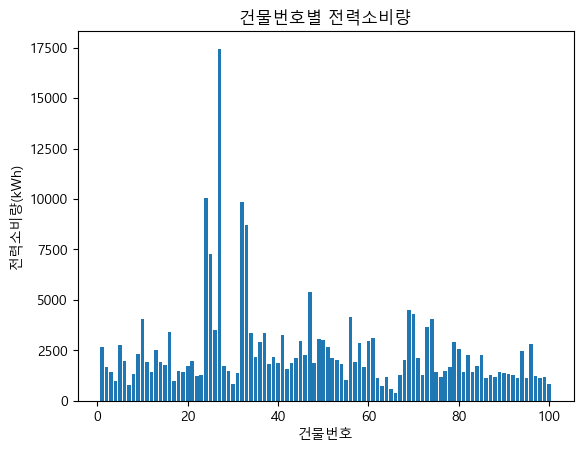

In [85]:
plt.bar(train_df.groupby('건물번호').mean().index, train_df.groupby('건물번호').mean()['전력소비량(kWh)'])
plt.title('건물번호별 전력소비량')
plt.xlabel('건물번호')
plt.ylabel('전력소비량(kWh)')
plt.show()

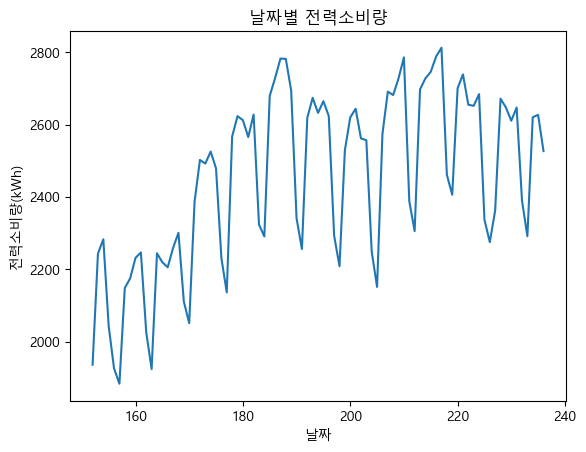

In [64]:
plt.plot(train_df.groupby('day').mean()['전력소비량(kWh)'])
plt.title('날짜별 전력소비량')
plt.xlabel('날짜')
plt.ylabel('전력소비량(kWh)')
plt.show()

날짜가 지나갈수록 점점 전력소비량이 증가하는 추세이다.

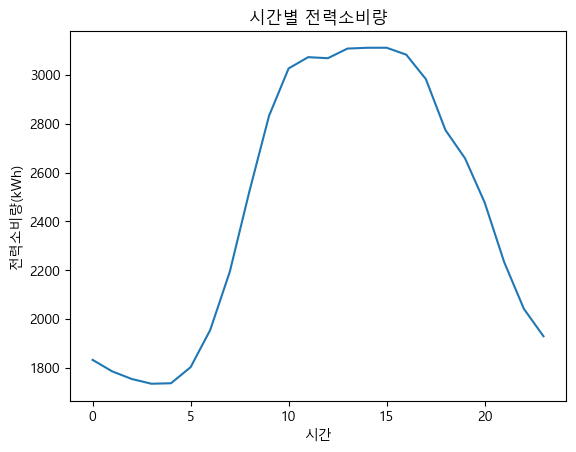

In [66]:
plt.plot(train_df.groupby('time').mean()['전력소비량(kWh)'])
plt.title('시간별 전력소비량')
plt.xlabel('시간')
plt.ylabel('전력소비량(kWh)')
plt.show()

낮시간대에 전력소비량이 높은 것을 확인할 수 있다.

train_df의 특성들을 그래프로 확인해보면

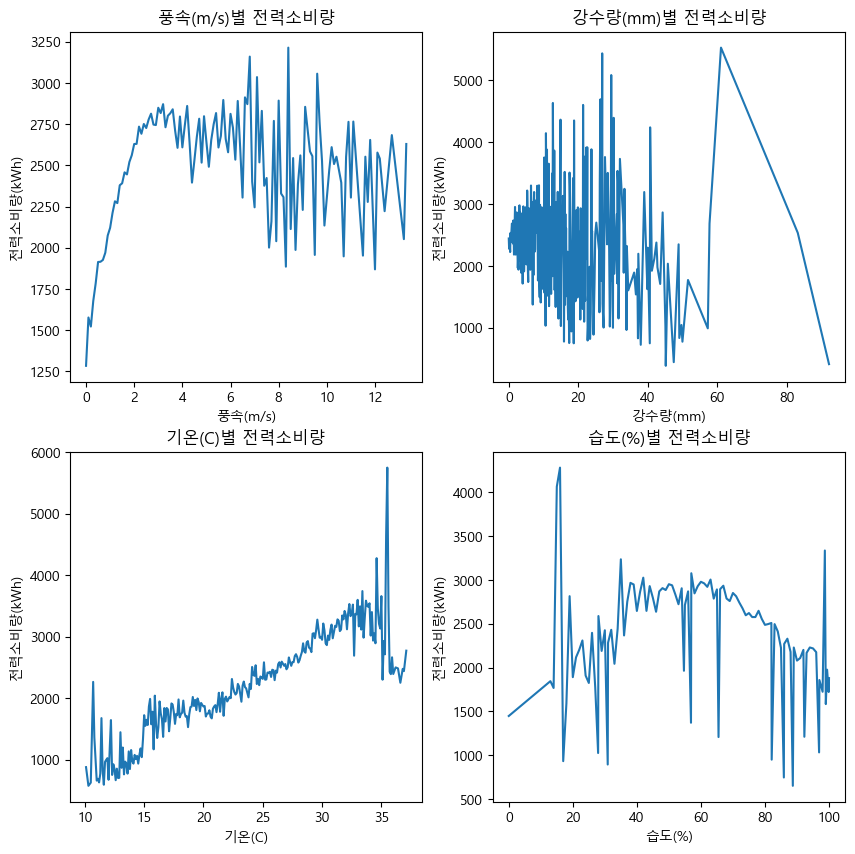

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('풍속(m/s)별 전력소비량')
plt.plot(train_df.groupby('풍속(m/s)').mean()['전력소비량(kWh)'])
plt.xlabel('풍속(m/s)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,2)
plt.title('강수량(mm)별 전력소비량')
plt.plot(train_df.groupby('강수량(mm)').mean()['전력소비량(kWh)'])
plt.xlabel('강수량(mm)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,3)
plt.title('기온(C)별 전력소비량')
plt.plot(train_df.groupby('기온(C)').mean()['전력소비량(kWh)'])
plt.xlabel('기온(C)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,4)
plt.title('습도(%)별 전력소비량')
plt.plot(train_df.groupby('습도(%)').mean()['전력소비량(kWh)'])
plt.xlabel('습도(%)')
plt.ylabel('전력소비량(kWh)')
plt.show()

기온이 증가할 수록 전력소비량이 증가하는 추세를 확인할 수 있었으나 습도, 강수량, 풍속에 관한 추세는 확인하지 못하였다.

그래프를 산점도로 확인해보면

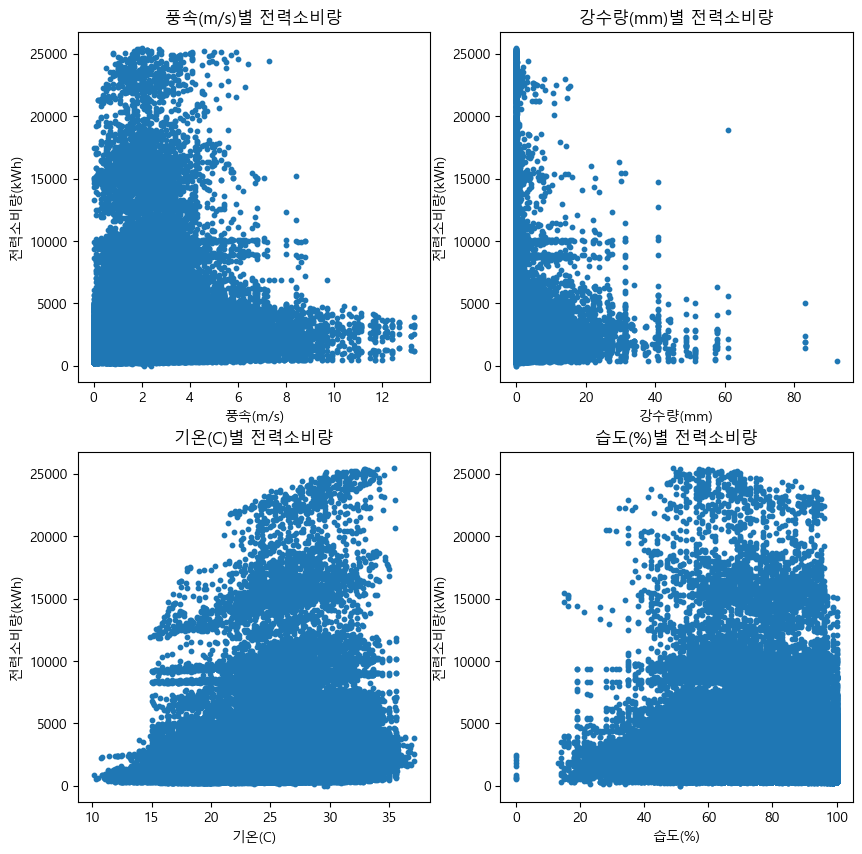

In [110]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('풍속(m/s)별 전력소비량')
#plt.plot(train_df.groupby('풍속(m/s)').mean()['전력소비량(kWh)'])
plt.scatter(train_df['풍속(m/s)'], train_df['전력소비량(kWh)'], s=10)
plt.xlabel('풍속(m/s)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,2)
plt.title('강수량(mm)별 전력소비량')
#plt.plot(train_df.groupby('강수량(mm)').mean()['전력소비량(kWh)'])
plt.scatter(train_df['강수량(mm)'], train_df['전력소비량(kWh)'], s=10)
plt.xlabel('강수량(mm)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,3)
plt.title('기온(C)별 전력소비량')
#plt.plot(train_df.groupby('기온(C)').mean()['전력소비량(kWh)'])
plt.scatter(train_df['기온(C)'], train_df['전력소비량(kWh)'], s=10)
plt.xlabel('기온(C)')
plt.ylabel('전력소비량(kWh)')
plt.subplot(2,2,4)
plt.title('습도(%)별 전력소비량')
#plt.plot(train_df.groupby('습도(%)').mean()['전력소비량(kWh)'])
plt.scatter(train_df['습도(%)'], train_df['전력소비량(kWh)'], s=10)
plt.xlabel('습도(%)')
plt.ylabel('전력소비량(kWh)')
plt.show()

풍속과 강수량의 경우 수치가 큰 값들의 경우 전력소비량이 낮은 추세를 확인할 수 있었고 습도의 경우 낮은구간에서 전력소비량이 낮은 추세를 확인할 수 있었다.

### building_info

In [112]:
building_info.groupby('건물유형').count()

,건물번호,연면적(m2),냉방면적(m2)
건물유형,,,
0,8,8,8
1,8,8,8
2,15,15,15
3,5,5,5
4,8,8,8
5,8,8,8
6,8,8,8
7,8,8,8
8,8,8,8


건물유형은 2, 3을 제외하고는 모두 8개씩의 건물번호를 가지고 있어 거의 균등하게 분포해있다.

train_df와 결합하여 자세한 정보를 확인해보자.

In [115]:
new_train_df = pd.merge(train_df, building_info, on='건물번호')
new_train_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),day,time,weekday,건물유형,연면적(m2),냉방면적(m2)
0,1,18.6,0.0,0.9,42.0,1085.28,152,0,2,2,110634.00,39570.00
1,1,18.0,0.0,1.1,45.0,1047.36,152,1,2,2,110634.00,39570.00
2,1,17.7,0.0,1.5,45.0,974.88,152,2,2,2,110634.00,39570.00
3,1,16.7,0.0,1.4,48.0,953.76,152,3,2,2,110634.00,39570.00
4,1,18.4,0.0,2.8,43.0,986.40,152,4,2,2,110634.00,39570.00
...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.0,0.9,86.0,881.04,236,19,2,0,57497.84,40035.23
203996,100,22.4,0.0,1.3,86.0,798.96,236,20,2,0,57497.84,40035.23
203997,100,21.3,0.0,1.0,92.0,825.12,236,21,2,0,57497.84,40035.23
203998,100,21.0,0.0,0.3,94.0,640.08,236,22,2,0,57497.84,40035.23


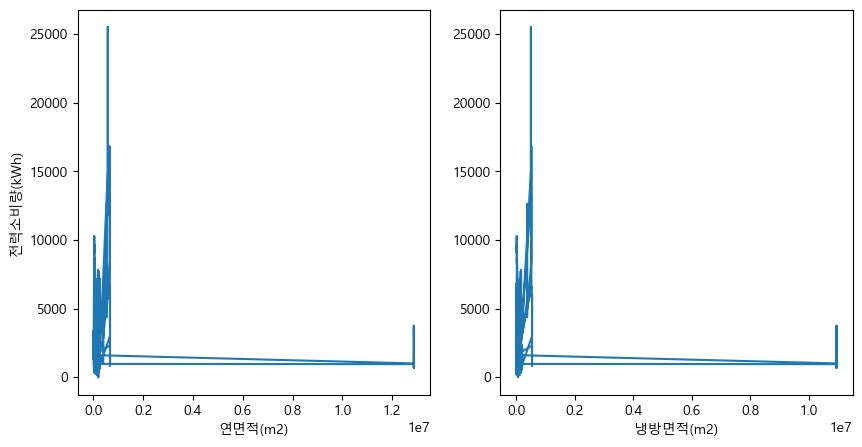

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('연면적(m2)')
plt.ylabel('전력소비량(kWh)')
plt.plot(new_train_df['연면적(m2)'],new_train_df['전력소비량(kWh)'])
plt.subplot(1,2,2)
plt.xlabel('냉방면적(m2)')
plt.plot(new_train_df['냉방면적(m2)'],new_train_df['전력소비량(kWh)'])
plt.show()

면적 1.0 * 1e7 (m^2) 이하의 밀집구간에 대해 자세히 보면

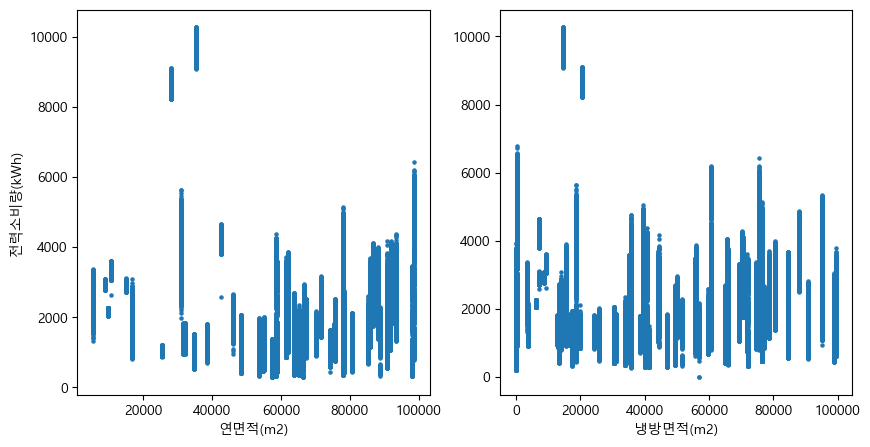

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('연면적(m2)')
plt.ylabel('전력소비량(kWh)')
plt.scatter(new_train_df[new_train_df['연면적(m2)']<=100000]['연면적(m2)'],new_train_df[new_train_df['연면적(m2)']<=100000]['전력소비량(kWh)'], s=5)
plt.subplot(1,2,2)
plt.xlabel('냉방면적(m2)')
plt.scatter(new_train_df[new_train_df['냉방면적(m2)']<=100000]['냉방면적(m2)'],new_train_df[new_train_df['냉방면적(m2)']<=100000]['전력소비량(kWh)'], s=5)
plt.show()

연면적(m2)과 냉방면적(m2)이 전력소비량과 가지는 연관성을 확인할 수 없었다.

## Feature engineering

날짜별 전력소비량을 보면 일정한 주기로 높고 낮음이 있는것을 확인할 수 있다. 이 경향을 확인하기 위해 요일별 전력사용량을 확인해보자.

<AxesSubplot:xlabel='weekday', ylabel='전력소비량(kWh)'>

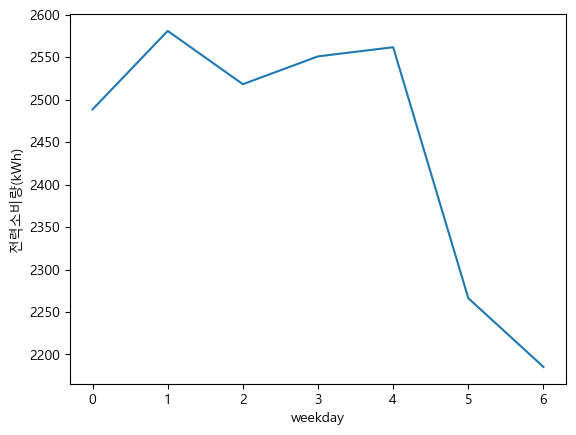

In [37]:
new_train_df.groupby('weekday').mean()['전력소비량(kWh)'].plot(ylabel='전력소비량(kWh)')

주말인 토, 일요일에 해당하는 5, 6일때 전력사용량이 확연히 적은 것을 확인할 수 있었다.

weekday를 새롭게 주말과 평일로 구분하여 정의한다. (주말 = 0, 평일 = 1)

In [51]:
new_train_df['weekday'] = new_train_df['weekday'].apply(lambda x: 0 if x>=5 else 1)

이제 평일과 공휴일을 구분하여 날짜별 전력소비량 추세를 확인해보자.

Text(0.5, 0, '평일')

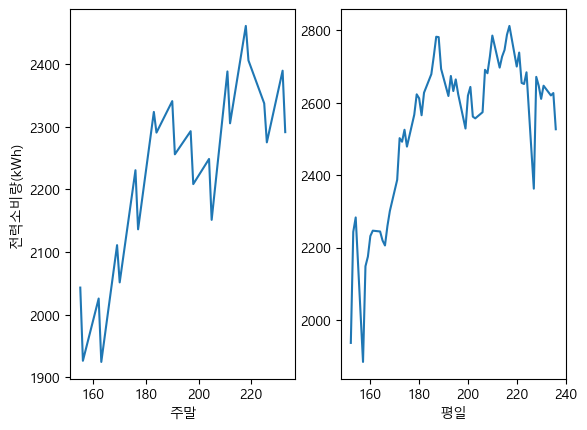

In [39]:
plt.subplot(1,2,1)
new_train_df[new_train_df['weekday']==0].groupby('day')['전력소비량(kWh)'].mean().plot()
plt.xlabel('주말')
plt.ylabel('전력소비량(kWh)')
plt.subplot(1,2,2)
new_train_df[new_train_df['weekday']==1].groupby('day')['전력소비량(kWh)'].mean().plot()
plt.xlabel('평일')

시간의 흐름에 따라 전력소비량이 증가하는 추세이지만 변동폭이 여전히 많은 것을 확인할 수 있다.

train data는 2022년 6월 1일부터 2022년 8월 24일 까지의 data이며 이 기간동안 3번의 공휴일이 있었다.

    6월 1일(수) : 지방선거
    6월 6일(월) : 현충일
    8월 15일(월) : 광복절

공휴일과 전력소비량의 관계를 알아보자.

각 공휴일의 전력 소비량을 다음 평일의 전력 소비량과 비교하여보자.

In [27]:
print('6월 1일 전력소비량 :', new_train_df[new_train_df['day']==152]['전력소비량(kWh)'].mean())
print('6월 2일 전력소비량 :', new_train_df[new_train_df['day']==153]['전력소비량(kWh)'].mean())
print('\n')
print('6월 6일 전력소비량 :', new_train_df[new_train_df['day']==157]['전력소비량(kWh)'].mean())
print('6월 7일 전력소비량 :', new_train_df[new_train_df['day']==158]['전력소비량(kWh)'].mean())
print('\n')
print('8월 15일 전력소비량 :', new_train_df[new_train_df['day']==227]['전력소비량(kWh)'].mean())
print('8월 16일 전력소비량 :', new_train_df[new_train_df['day']==228]['전력소비량(kWh)'].mean())

6월 1일 전력소비량 : 1936.61609236125
6월 2일 전력소비량 : 2243.3779854166664


6월 6일 전력소비량 : 1884.0711249999997
6월 7일 전력소비량 : 2148.3272312500003


8월 15일 전력소비량 : 2362.6388472225003
8월 16일 전력소비량 : 2671.4192020833334


공휴일의 경우 전력소비량이 확연히 적은 것을 확인할 수 있기에 새로운 특성 holiday를 추가하여 공휴일을 구분할 수 있게 한다.(공휴일 = 0 , 평일 = 1)

In [52]:
new_train_df['holiday'] = new_train_df['day'].apply(lambda x: 0 if x in [152, 157, 227] else 1)

시간별 전력소비량의 경우 낮시간대에 높고 새벽시간대에 가장 적다. 하지만 0에서 23으로 나뉘어진 시간대는 이를 표현하기에 적합하지 않으며 0과 23이 시간적으로 연속되었음도 나타낼 수 없다.

In [43]:
new_train_df.groupby('time')['전력소비량(kWh)'].mean()

time
0     1832.909812
1     1785.853802
2     1754.573766
3     1735.193839
4     1737.142635
5     1802.902792
6     1955.082864
7     2193.829010
8     2523.012146
9     2831.775355
10    3026.153066
11    3072.319175
12    3067.945454
13    3107.388915
14    3110.709623
15    3110.862278
16    3082.497781
17    2982.488583
18    2773.693784
19    2657.821822
20    2477.181846
21    2232.160672
22    2041.831695
23    1929.544372
Name: 전력소비량(kWh), dtype: float64

'time'을 낮2시와 새벽 2시를 최고점과 최저점으로 하는 삼각함수로 대체한다.

In [53]:
new_train_df['time'] = new_train_df['time'].apply(lambda x: np.sin((x-8)*np.pi/12))
new_train_df['time'][0:23]

0    -8.660254e-01
1    -9.659258e-01
2    -1.000000e+00
3    -9.659258e-01
4    -8.660254e-01
5    -7.071068e-01
6    -5.000000e-01
7    -2.588190e-01
8     0.000000e+00
9     2.588190e-01
10    5.000000e-01
11    7.071068e-01
12    8.660254e-01
13    9.659258e-01
14    1.000000e+00
15    9.659258e-01
16    8.660254e-01
17    7.071068e-01
18    5.000000e-01
19    2.588190e-01
20    1.224647e-16
21   -2.588190e-01
22   -5.000000e-01
Name: time, dtype: float64

<AxesSubplot:>

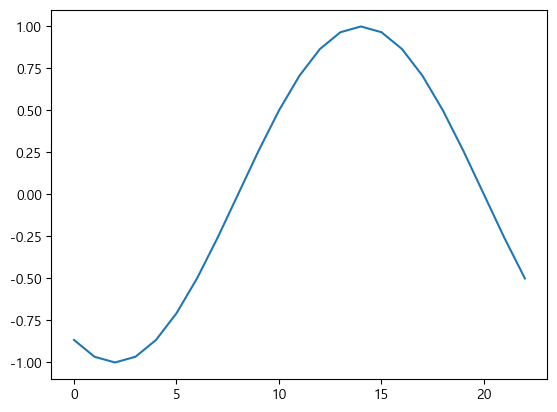

In [54]:
new_train_df['time'][0:23].plot()

연면적(m2)과 냉방면적(m2)은 전력소비량(kWh)와 연관성을 보이지 않기에 dataframe에서 제거한다.

In [55]:
new_train_df = new_train_df.drop(['연면적(m2)','냉방면적(m2)'], axis=1)

new_train_df 를 save하고 전처리를 종료한다. test.csv 역시 new_train_df와 같은 전처리를 진행한다.

In [59]:
new_train_df.to_csv('./train_preprocessed.csv', index=False)

In [64]:
test_df['weekday'] = test_df['weekday'].apply(lambda x: 0 if x>=5 else 1)
test_df['holiday'] = test_df['day'].apply(lambda x: 0 if x in [152, 157, 227] else 1)
test_df['time'] = test_df['time'].apply(lambda x: np.sin((x-8)*np.pi/12))
test_df.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),day,time,weekday,holiday
0,1,23.5,0.0,2.2,72,237,-0.866025,1,1
1,1,23.0,0.0,0.9,72,237,-0.965926,1,1
2,1,22.7,0.0,1.5,75,237,-1.000000,1,1
3,1,22.1,0.0,1.3,78,237,-0.965926,1,1
4,1,21.8,0.0,1.0,77,237,-0.866025,1,1


In [66]:
test_df.to_csv('./test_preprocessed.csv', index=False)

전처리와 분석한 내용을 바탕으로 전력소비량을 예측하는 모델을 구현한다.